In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv('diabetes.csv')
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [11]:
# Use SimpleImputer to fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [12]:
# Encode categorical columns using LabelEncoder
for column in df_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_imputed[column] = le.fit_transform(df_imputed[column])


In [13]:
# Split data into features and target
X = df_imputed.drop('Target', axis=1)
y = df['Target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=25, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=25, random_state=42)

In [15]:
# Make predictions
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-score: 0.90

Classification Report:
                                             precision    recall  f1-score   support

   Cystic Fibrosis-Related Diabetes (CFRD)       0.99      0.90      0.94      1070
                      Gestational Diabetes       0.89      0.92      0.90      1072
                                      LADA       0.95      0.94      0.94      1072
                                      MODY       0.93      0.86      0.90      1194
          Neonatal Diabetes Mellitus (NDM)       1.00      1.00      1.00      1018
                               Prediabetic       0.97      1.00      0.98      1089
                        Secondary Diabetes       0.78      0.77      0.78      1053
                  Steroid-Induced Diabetes       0.83      0.78      0.80      1048
                           Type 1 Diabetes       0.86      0.97      0.91      1123
                           Type 2 Diabetes       0.88      0.71      0.79  

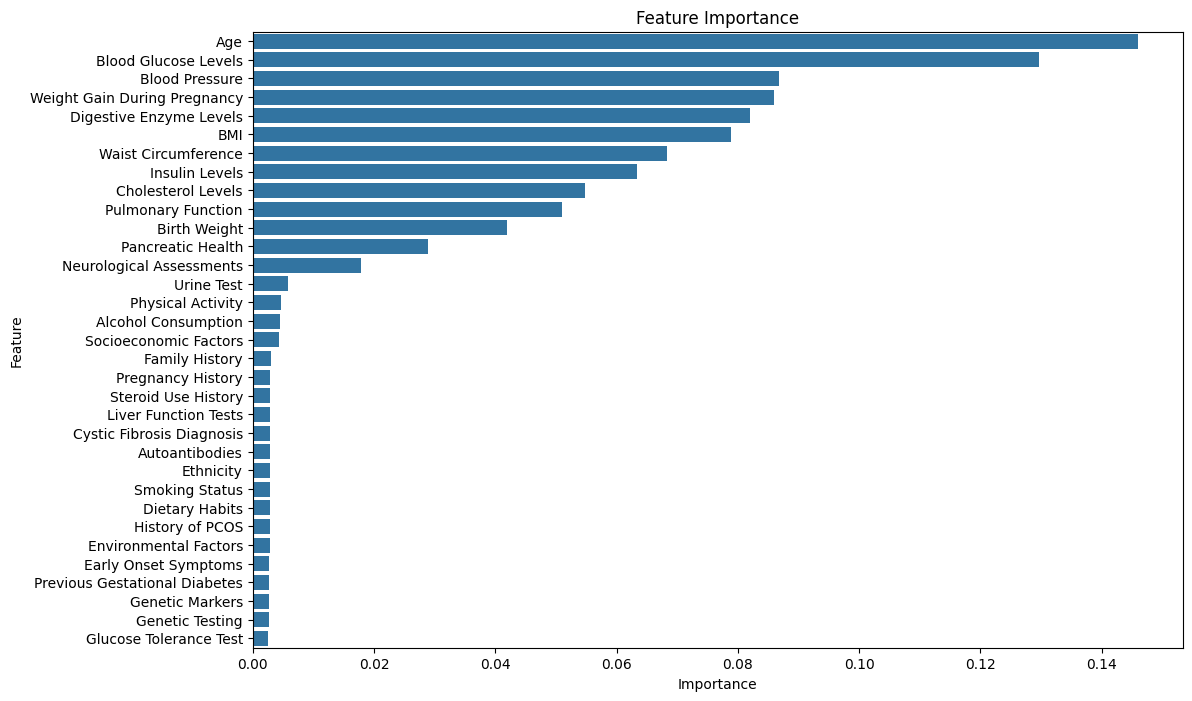

In [16]:
# Feature importance
feature_importances = rf.feature_importances_
features = X.columns

dFrame = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
dFrame.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dFrame)
plt.title('Feature Importance')
plt.show()
